In [1]:
# Import our dependencies
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:

# Import our input dataset
attrition_df = pd.read_csv('./data/HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# generate categorical column list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == 'object'].index.tolist()

In [4]:
attrition_cat_df = attrition_df[attrition_cat]
attrition_cat_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [5]:
# create onehotencoder instance
enc = OneHotEncoder(sparse=False)
# fit and transform 
encoded = enc.fit_transform(attrition_df[attrition_cat])
# make data frame and set columns = feature names
encode_df = pd.DataFrame(encoded)
encode_df.columns = enc.get_feature_names_out(attrition_cat)

encode_df.head()

,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [6]:
# merge and drop
attrition_df = attrition_df.merge(encode_df, left_index=True, right_index=True).drop(columns=attrition_cat, axis=1)
print(attrition_df.columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No',
       'Attrition_Yes', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gen

In [7]:
def split_target_data(data, target, drop):
    data = data.copy()

    y = data[target].ravel()

    X = data.copy()
    X = X.drop(columns=drop, axis=1)
    
    return X, y

In [8]:
drop_columns = ['Attrition_Yes','Attrition_No']
X, y = split_target_data(attrition_df, target='Attrition_Yes', drop=drop_columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
def scale_data(X_train, X_test):
    scl = StandardScaler()

    X_scaler = scl.fit(X_train)

    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)    

    return X_train_scaled, X_test_scaled

In [11]:
X_train, X_test = scale_data(X_train, X_test)
len(X_train[0])

55

In [12]:
def make_nn_model(data, hidden_1, hidden_2):
    input_features = len(data[0])

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(units=hidden_1, input_dim=input_features, activation='relu'))

    model.add(tf.keras.layers.Dense(units=hidden_2, activation='relu'))

    model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    model.summary()

    return model 

In [13]:
nn_model = make_nn_model(X_train, hidden_1=8, hidden_2=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 448       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [14]:
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit_model = nn_model.fit(X_train, y_train, epochs=300)

Epoch 1/300
35/35 [==============================] - 1s 1ms/step - loss: 0.7596 - accuracy: 0.4991
Epoch 2/300
35/35 [==============================] - 0s 1ms/step - loss: 0.5936 - accuracy: 0.7078
Epoch 3/300
35/35 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.8085
Epoch 4/300
35/35 [==============================] - 0s 1ms/step - loss: 0.4511 - accuracy: 0.8376
Epoch 5/300
35/35 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.8494
Epoch 6/300
35/35 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8539
Epoch 7/300
35/35 [==============================] - 0s 1ms/step - loss: 0.3825 - accuracy: 0.8548
Epoch 8/300
35/35 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8612
Epoch 9/300
35/35 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.8702
Epoch 10/300
35/35 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8766
Epoch 11/

In [15]:
def get_loss_accuracy(model):
    index_range = range(1, len(model.history['loss'])+1)

    la_df = pd.DataFrame(model.history, index=index_range)
    model
    plt.subplots()
    plt.plot(la_df, label=['loss','accuracy'])
    plt.title(f'loss/accuracy metric: {len(index_range)} epochs')
    plt.show()
    
    return la_df

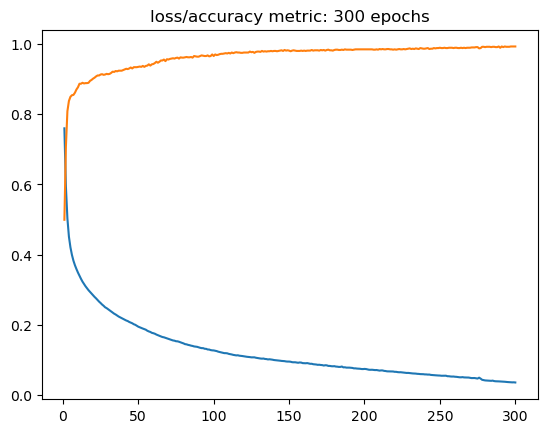

In [16]:
accuracy_df = get_loss_accuracy(fit_model)

In [17]:
model_loss, model_accuracy = nn_model.evaluate(X_test, y_test, verbose=2)
print(f'Loss: {model_loss} | Accuracy: {model_accuracy}')

12/12 - 0s - loss: 1.1890 - accuracy: 0.8234 - 163ms/epoch - 14ms/step
Loss: 1.189022183418274 | Accuracy: 0.823369562625885
